In [1]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '.')))
if 'ilya' in os.getcwd():
    os.chdir('/Users/ilya/Documents/Kaggle_Bimbo/')
else:
    os.chdir('/Users/margarita/Kaggle/Bimbo/')

Populating the interactive namespace from numpy and matplotlib


preprocessing_time_series.py

In [2]:
data_train = pd.read_csv('train_JALISCO_timeseries.csv')
print(data_train.shape)
data_train.head()

(6533169, 44)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,...,Town,State,NombreProducto,brand,weight,pieces,Has_choco,Has_vanilla,Has_multigrano,NombreCliente
0,3,1310,1,1051,19905,73,1,21.32,0,0.00,...,2260 GONZALEZ GALLO,JALISCO,Pan Multigrano Linaza 540g BIM 73,BIM,540.0,NaN,0,0,1,BCH
1,3,1310,1,1051,19905,1109,5,75.05,0,0.00,...,2260 GONZALEZ GALLO,JALISCO,Pan Blanco Chico 360g BIM 1109,BIM,360.0,NaN,0,0,0,BCH
2,3,1310,1,1051,19905,1125,12,115.20,0,0.00,...,2260 GONZALEZ GALLO,JALISCO,Tortillinas 10p 255g TR 1125,TR,255.0,10.0,0,0,0,BCH
3,3,1310,1,1051,19905,1146,5,106.95,0,0.00,...,2260 GONZALEZ GALLO,JALISCO,Pan Integral 675g BIM 1146,BIM,675.0,NaN,0,0,0,BCH
4,3,1310,1,1051,19905,1150,6,83.76,3,41.88,...,2260 GONZALEZ GALLO,JALISCO,Medias Noches 8p 340g BIM 1150,BIM,340.0,8.0,0,0,0,BCH


In [8]:
data_train['Demanda_uni_equil'] = data_train['Log_Demanda'].apply(np.expm1)
data_train['Demanda_uni_equil_1'] = data_train['Log_Demanda_1'].apply(np.expm1)
data_train[['Demanda_uni_equil', 'Venta_uni_hoy', 'Dev_uni_proxima', 'Demanda_uni_equil_1', 'Venta_uni_hoy_1', 'Dev_uni_proxima_1']].dropna().head(20)

,Demanda_uni_equil,Venta_uni_hoy,Dev_uni_proxima,Demanda_uni_equil_1,Venta_uni_hoy_1,Dev_uni_proxima_1
990007,1.0,1,0,1.0,1.0,0.0
990008,6.0,6,0,5.0,5.0,0.0
990009,9.0,9,0,12.0,12.0,0.0
990010,1.0,1,0,5.0,5.0,0.0
990011,3.0,3,0,7.0,7.0,0.0
990012,5.0,5,0,9.0,9.0,0.0
990013,9.0,9,0,2.0,2.0,0.0
990014,11.0,11,0,7.0,7.0,0.0
990015,2.0,2,0,1.0,1.0,0.0
990016,6.0,6,0,2.0,2.0,0.0


In [9]:
data_train.columns[4:]

Index([u'Cliente_ID', u'Producto_ID', u'Venta_uni_hoy', u'Venta_hoy',
       u'Dev_uni_proxima', u'Dev_proxima', u'Dev_proxima_by_uni',
       u'No_remains', u'Log_Demanda', u'Venta_uni_hoy_1', u'Venta_hoy_1',
       u'Dev_uni_proxima_1', u'Dev_proxima_1', u'Dev_proxima_by_uni_1',
       u'No_remains_1', u'Log_Demanda_1', u'Venta_uni_hoy_2', u'Venta_hoy_2',
       u'Dev_uni_proxima_2', u'Dev_proxima_2', u'Dev_proxima_by_uni_2',
       u'No_remains_2', u'Log_Demanda_2', u'Venta_uni_hoy_3', u'Venta_hoy_3',
       u'Dev_uni_proxima_3', u'Dev_proxima_3', u'Dev_proxima_by_uni_3',
       u'No_remains_3', u'Log_Demanda_3', u'Town', u'State', u'NombreProducto',
       u'brand', u'weight', u'pieces', u'Has_choco', u'Has_vanilla',
       u'Has_multigrano', u'NombreCliente', u'Demanda_uni_equil',
       u'Demanda_uni_equil_1'],
      dtype='object')

In [11]:
data_train = data_train.dropna()

In [13]:
data_train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,...,NombreProducto,brand,weight,pieces,Has_choco,Has_vanilla,Has_multigrano,NombreCliente,Demanda_uni_equil,Demanda_uni_equil_1
2923279,6,1310,1,1057,300176,1129,0,0.00,15,256.00,...,Tortillinas 20p 510g TR 1129,TR,510.0,20.0,0,0,0,FIDEL GUZMAN MORA,0.0,0.0
2930949,6,1310,1,1080,676720,3678,4,75.44,1,18.86,...,Bimbollos 8p 450g Prom BIM 3678,BIM,450.0,8.0,0,0,0,CECILIA ELIZABEHT GUZMAN GOMEZ,3.0,0.0
2935808,6,1310,1,1157,300176,35651,10,75.00,10,75.00,...,Madalenas 3p 93g BIM 35651,BIM,93.0,3.0,0,0,0,FIDEL GUZMAN MORA,0.0,16.0
2937473,6,1310,1,1159,1079325,35651,5,37.50,2,15.00,...,Madalenas 3p 93g BIM 35651,BIM,93.0,3.0,0,0,0,RIGOBERTO ENRIQUEZ JIMENEZ,3.0,0.0
2938464,6,1310,1,1161,98277,35651,3,22.50,6,45.00,...,Madalenas 3p 93g BIM 35651,BIM,93.0,3.0,0,0,0,MARCOS,0.0,0.0


In [7]:
import crossval

cv5fold, strats = crossval.crossvalidation(data_train[['Canal_ID', 'Semana']])
strats.value_counts()

JALISCO_3    990007
JALISCO_4    983130
JALISCO_5    947125
JALISCO_7    927465
JALISCO_9    911789
JALISCO_6    887590
JALISCO_8    886063
dtype: int64

# Linear Model

In [18]:
text_features = list(data_train.columns[[x.name == 'object' for x in data_train.dtypes]])
text_features

['Town', 'State', 'NombreProducto', 'brand', 'NombreCliente']

In [22]:
data_for_model = data_train.replace(np.nan, 0).drop(text_features, axis = 1)

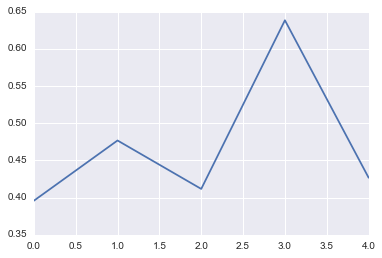

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.cross_validation import cross_val_score

elasticNet = ElasticNet() # L1 + L2 regularization

scores = cross_val_score(elasticNet, data_for_model.drop(['Log_Demanda'], axis = 1), 
                         y= data_for_model['Log_Demanda'], 
                         scoring = 'mean_squared_error', cv=cv5fold, n_jobs=-1)

plt.plot(-1*scores)

In [29]:
elasticNet.fit(data_for_model.drop(['Log_Demanda'], axis = 1), 
                         y= data_for_model['Log_Demanda'])

pd.Series(elasticNet.coef_, index=data_train.drop(text_features+['Log_Demanda'], axis = 1).columns)

Semana                 -0.000000e+00
Agencia_ID             -4.104412e-05
Canal_ID                0.000000e+00
Ruta_SAK                5.712570e-05
Cliente_ID             -1.222029e-08
Producto_ID            -1.378509e-06
Venta_uni_hoy           2.630568e-02
Venta_hoy              -3.874659e-04
Dev_uni_proxima        -0.000000e+00
Dev_proxima            -1.222122e-03
Dev_proxima_by_uni     -0.000000e+00
No_remains             -0.000000e+00
Venta_uni_hoy_1         2.745093e-03
Venta_hoy_1            -0.000000e+00
Dev_uni_proxima_1      -0.000000e+00
Dev_proxima_1          -0.000000e+00
Dev_proxima_by_uni_1   -0.000000e+00
No_remains_1           -0.000000e+00
Log_Demanda_1           0.000000e+00
Venta_uni_hoy_2         0.000000e+00
Venta_hoy_2             3.709767e-05
Dev_uni_proxima_2      -0.000000e+00
Dev_proxima_2          -0.000000e+00
Dev_proxima_by_uni_2   -0.000000e+00
No_remains_2           -0.000000e+00
Log_Demanda_2           0.000000e+00
Venta_uni_hoy_3         0.000000e+00
V

In [ ]:
# Title211™3¢!@3£¢¡£123qer 